##Importing Libraries

In [ ]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
def churn_rate(data):
    churn = (sum(data['Target_variable_churn'])/len(data['Target_variable_churn'].index))*100
    return churn

In [ ]:
def plot_heat_map(data):
    # Let's see the correlation matrix 
    plt.figure(figsize = (20,10))        # Size of the figure
    sns.heatmap(data.corr(),annot = True)

def describe_percentile(data):
     return data.describe(percentiles=[0.25,0.3,0.50,0.70,0.85,0.90,0.99])
                    
def month_data(data,key):
    listofMonth_feature=[]
    for i in data.columns:
         if i[-1]==key:
            listofMonth_feature.append(i)
    return (data.loc[:,listofMonth_feature])
    

In [ ]:
# Importing datasets
data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [ ]:
# (Datapoints,Features)
data1=data
data.shape

(99999, 226)

# Initial Data Pre Processing
## Defining Target Variable on the basis of Month September
churn=> if 0 usage(internet/call) else=> Not churn

In [ ]:
#Creating Target variable by using total_ic/og and vol_2g/3g consumed in month of sept to check churn
data1["Target_variable_dummy"]=data1.total_ic_mou_9+data1.total_og_mou_9+ data1.vol_2g_mb_9+data1.vol_3g_mb_9
churn_target=data1.Target_variable_dummy.apply(lambda x : 1 if x ==0 else 0)
data1["Target_variable_churn"]=churn_target
#Removing dummy variable
data1=data1.drop("Target_variable_dummy",axis=1)
data1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Target_variable_churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [ ]:
#churn rate in data initially
churn_rate(data1)

10.19110191101911

In [ ]:
#Deleting date columns with no relevant information to be used
#Visualising unique values before deleting
print(data1.last_date_of_month_6.unique())
print(data1.last_date_of_month_7.unique())
print(data1.last_date_of_month_8.unique())
print(data1.last_date_of_month_9.unique())
print(data1["circle_id"].unique())

['6/30/2014']
['7/31/2014' nan]
['8/31/2014' nan]
['9/30/2014' nan]
[109]


In [ ]:
data1=data1.drop(["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9"],axis=1)
data1.shape

(99999, 223)

In [ ]:
#Removing other four columns as even if we predict something using time, we might be late to predict the churn
#Like waiting for 2week of inactiveness, while customer might have already chose another network

# we are going to use "Usage based churn" as in behaviour
data1=data1.drop(["circle_id","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"],axis=1)
data1.shape

(99999, 218)

## Retaining High valued customer


In [ ]:
#using month 6,7 generated revenue to create a mean of net revenue in "good phase"
mean_arpu6=(data1.total_rech_amt_6).mean()
mean_arpu7=(data1.total_rech_amt_7).mean()
print("month6 mean revenue=",mean_arpu6),print("month7 mean revenue=",mean_arpu7)
#Calculating x as 70th percentile of mean revenue by all customers, to distinguish high value customers
x6=(7*mean_arpu6)/10
x7=(7*mean_arpu7)/10
print("x6=",x6),print("x7=",x7)
#Retaining high customer values
data1=data1[data1.total_rech_amt_6>=x6]
data1=data1[data1.total_rech_amt_7>=x7]
data1.shape

month6 mean revenue= 327.51461514615147
month7 mean revenue= 322.9629696296963
x6= 229.26023060230605
x7= 226.07407874078746


(36270, 218)

In [ ]:
# We reduced our data points to almost 36% of initially given data points (99999)

In [ ]:
#Checking churn after retaining high value customers
churn_rate_initially=churn_rate(data1)
churn_rate_initially

6.708023159636063

In [ ]:
# We reduced our data points to almost 36% of initially given data points (99999)
# Also we lost 3.5% of churn data while retaining high valued clients. (initially 10.19)

In [ ]:
#Removing features with _9 data in the end [churn phase]
Month9_feature=month_data(data1,"9").columns
data1=data1.drop(Month9_feature,axis=1)
data1.shape

(36270, 166)

In [ ]:
#Dropping column of sept but with name as "sep"
data1=data1.drop('sep_vbc_3g',axis=1)

### Missing Values

In [ ]:
# Checking the percentage of missing values
round(100*(data1.isnull().sum()/len(data1.index)), 2).sort_values().tail(31)

std_og_mou_8                 2.10
night_pck_user_7            62.24
date_of_last_rech_data_7    62.24
arpu_2g_7                   62.24
count_rech_3g_7             62.24
arpu_3g_7                   62.24
max_rech_data_7             62.24
fb_user_7                   62.24
count_rech_2g_7             62.24
total_rech_data_7           62.24
av_rech_amt_data_7          62.24
fb_user_8                   62.34
arpu_3g_8                   62.34
count_rech_2g_8             62.34
arpu_2g_8                   62.34
date_of_last_rech_data_8    62.34
av_rech_amt_data_8          62.34
total_rech_data_8           62.34
count_rech_3g_8             62.34
night_pck_user_8            62.34
max_rech_data_8             62.34
total_rech_data_6           63.11
max_rech_data_6             63.11
night_pck_user_6            63.11
count_rech_2g_6             63.11
count_rech_3g_6             63.11
av_rech_amt_data_6          63.11
arpu_3g_6                   63.11
arpu_2g_6                   63.11
fb_user_6     

In [ ]:
data1.shape

(36270, 165)

<AxesSubplot:xlabel='roam_ic_mou_6', ylabel='Count'>

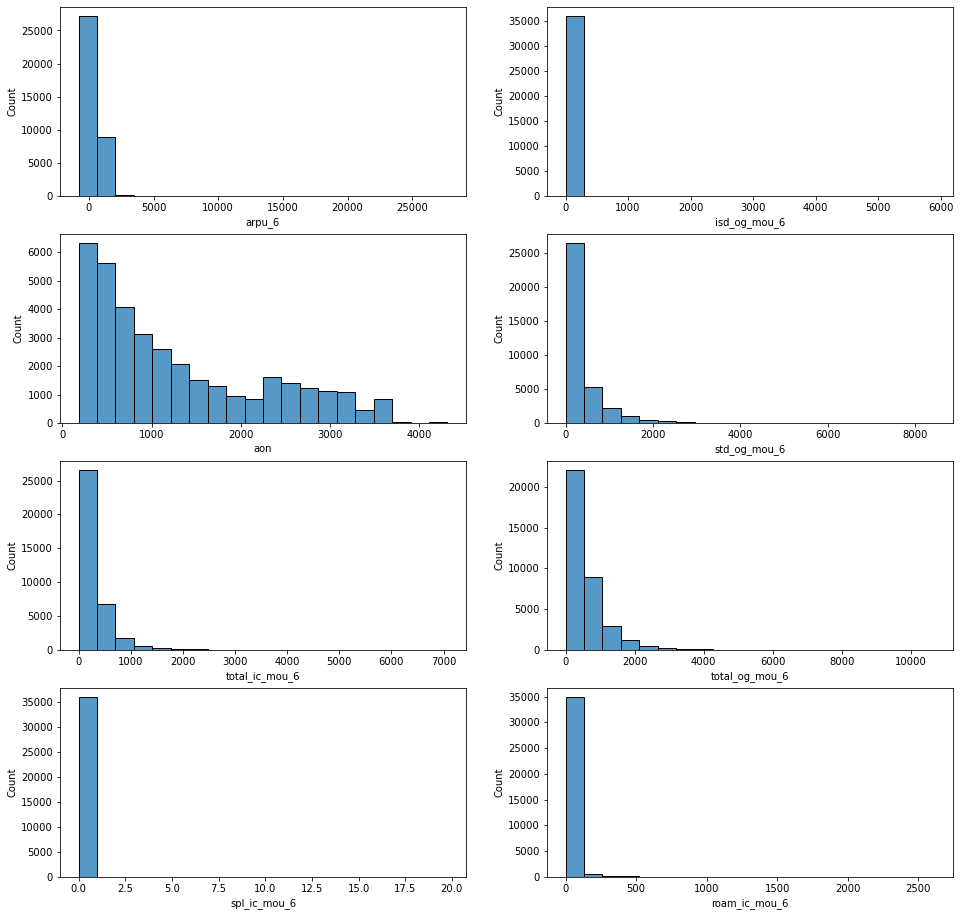

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(data1.arpu_6, bins = 20, ax=ax[0,0]) 
sns.histplot(data1.isd_og_mou_6, bins = 20, ax=ax[0,1]) 
sns.histplot(data1.aon, bins = 20, ax=ax[1,0]) 
sns.histplot(data1.std_og_mou_6, bins = 20, ax=ax[1,1]) 
sns.histplot(data1.total_ic_mou_6, bins = 20, ax=ax[2,0])
sns.histplot(data1.total_og_mou_6, bins = 20, ax=ax[2,1])
sns.histplot(data1.spl_ic_mou_6, bins = 20, ax=ax[3,0]) 
sns.histplot(data1.roam_ic_mou_6, bins = 20, ax=ax[3,1]) 

<Figure size 1440x1440 with 0 Axes>

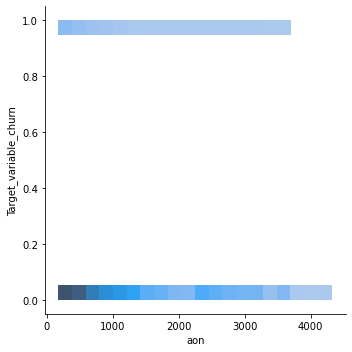

In [ ]:
plt.figure(figsize = (20,20)) 
sns.displot(y=data1.Target_variable_churn,x=data1.aon ,bins = 20)

In [ ]:
#Analysis on night_pck feature

x=data1[data1["night_pck_user_7"]==1 & (data1["Target_variable_churn"]==1)]
y=x.loc[:,["Target_variable_churn","night_pck_user_7"]]
y["rech"]=data1.total_rech_amt_7
#print(y.sort_values(by="night_pck_user_7",ascending=False).head(20))


x=data1[data1["night_pck_user_8"]==1 & (data1["Target_variable_churn"]==1)]
y=x.loc[:,["Target_variable_churn","night_pck_user_8"]]
y["rech"]=data1.total_rech_amt_8
#print(y.sort_values(by="night_pck_user_8",ascending=False).head(10))

#Result shows, churn has reduced in terms of night_pack_user in action phase
#dropping it anyway

In [ ]:
listMissing=data1.isnull().sum()
listMissing60=listMissing[listMissing>21000] #~60% of 36270
#Storing name of columns to be dropped
columns_to_remove=listMissing60.index

In [ ]:
#Dropping columns with more then 60% values missing
data1=data1.drop(columns_to_remove,axis=1)
data1.shape

(36270, 135)

In [ ]:
# Checking the percentage of missing values
round(100*(data1.isnull().sum()/len(data1.index)), 2).sort_values()

mobile_number         0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_6    0.0
max_rech_amt_8        0.0
                     ... 
ic_others_8           2.1
loc_og_mou_8          2.1
loc_og_t2c_mou_8      2.1
std_ic_t2t_mou_8      2.1
std_og_t2t_mou_8      2.1
Length: 135, dtype: float64

In [ ]:
#Dropping Missing values about 2% (information lost:850 out of 36270:0.2%)
datadummy=data1.dropna(axis=0)
print("Before:",churn_rate_initially)
print("After:",churn_rate(datadummy))

Before: 6.708023159636063
After: 5.3912994414038256


In [ ]:
# Wecan see there is almost 1% loss of churn data, if we remove missing values
#Therefore we will replace them with median values( we already have less data of churn)
data1=data1.fillna(data1.median())
data1.shape

(36270, 135)

In [ ]:
#Looking at our dataframe
describe_percentile(data1)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Target_variable_churn
count,3.627000e+04,36270.0,36270.0,36270.0,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,...,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000
mean,7.001227e+09,0.0,0.0,0.0,516.499188,518.558289,476.297569,254.332156,261.557958,232.358770,...,0.161759,0.153570,0.125999,0.136862,0.130356,1282.547588,117.931613,122.301558,107.234261,0.067080
std,6.823954e+05,0.0,0.0,0.0,406.850568,424.572594,450.693932,416.391706,437.309990,418.527477,...,0.567532,0.540984,0.819948,0.909003,0.924806,976.918441,362.167835,381.307614,353.306799,0.250164
min,7.000000e+09,0.0,0.0,0.0,-810.661000,-2014.045000,-345.129000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000650e+09,0.0,0.0,0.0,293.849500,295.723500,247.329500,36.060000,35.030000,27.180000,...,0.000000,0.000000,0.000000,0.000000,0.000000,484.000000,0.000000,0.000000,0.000000,0.000000
30%,7.000771e+09,0.0,0.0,0.0,316.228300,316.413100,274.057200,46.990000,45.760000,36.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,535.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001235e+09,0.0,0.0,0.0,415.904000,415.327000,386.905500,107.180000,105.680000,87.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,939.000000,0.000000,0.000000,0.000000,0.000000
70%,7.001698e+09,0.0,0.0,0.0,562.302100,565.423900,542.168600,230.996000,234.910000,195.716000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1645.000000,0.000000,0.000000,0.000000,0.000000
85%,7.002045e+09,0.0,0.0,0.0,775.589850,776.550700,754.437950,484.090000,506.925000,438.448500,...,0.000000,0.000000,0.000000,0.000000,0.000000,2573.000000,196.593000,192.916500,147.735500,0.000000
90%,7.002168e+09,0.0,0.0,0.0,907.130300,908.381600,887.836600,668.105000,689.581000,614.696000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2868.000000,396.935000,403.868000,346.248000,0.000000


##  Feature Processing

In [ ]:
#Visualising june month's data to get the idea of features and drop least important features
# Then removing from all dataframes

june_data=month_data(data1,"6")
june_data.head(3)

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,...,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6
0,197.385,107.18,243.19,0.00,0.00,30.03,94.085,0.30,0.0,153.40,...,4,362,252,252,30.13,83.57,0,0,1,0
3,221.338,99.91,123.31,0.00,0.00,73.68,107.430,1.91,0.0,183.03,...,10,230,60,30,0.00,0.00,0,0,0,0
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.630,62.13,0.0,422.16,...,5,1580,1580,0,0.00,0.00,0,0,0,0


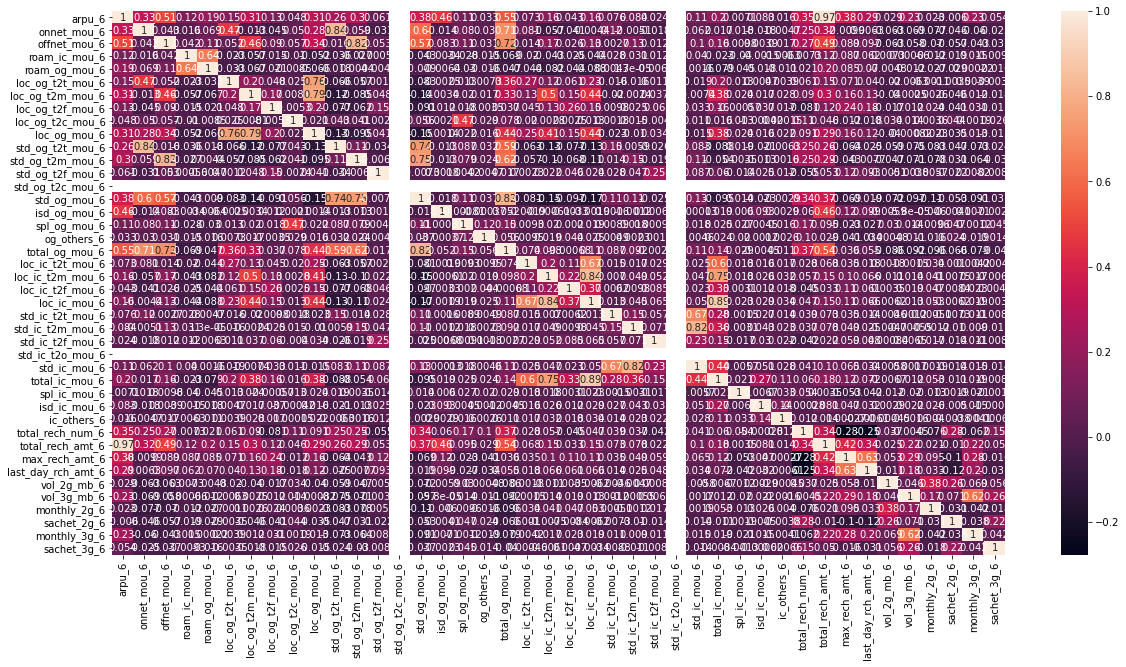

In [ ]:
# Let's see the correlation matrix 
plot_heat_map(june_data)

In [ ]:
#It seems arpu and total recharge amount depict the same info and hence have high co-relation of 97%
#There are many more such relations

In [ ]:
#Creating some new derived metrics

#We can combine them to make new column and drop these two
data1["internet_usage_6"]=data1.vol_2g_mb_6+data1.vol_3g_mb_6 
data1["internet_usage_7"]=data1.vol_2g_mb_7+data1.vol_3g_mb_7 
data1["internet_usage_8"]=data1.vol_2g_mb_8+data1.vol_3g_mb_8

#Internet usage overall in good and action phase
#data1["internet_useRatio_goodVSaction"]=data1.internet_usage_8/((data1.internet_usage_6+data1.internet_usage_7+0.0002)/2)

data1["call_usage_6"]=data1.total_og_mou_6+data1.total_ic_mou_6
data1["call_usage_7"]=data1.total_og_mou_7+data1.total_ic_mou_7
data1["call_usage_8"]=data1.total_og_mou_8+data1.total_ic_mou_8


#Call usage overall in good and action phase
#data1["call_useRatio_goodVSaction"]=data1.call_usage_8/((data1.call_usage_6+data1.call_usage_7+0.0002)/2)

#Combining satchet_2g/3g rech count

data1["sachet_2p3_6"]=data1.sachet_3g_6+data1.sachet_2g_6
data1["sachet_2p3_7"]=data1.sachet_3g_7+data1.sachet_2g_7
data1["sachet_2p3_8"]=data1.sachet_3g_8+data1.sachet_2g_8

In [ ]:
#We did this to visulaise better
#"arpu_6" is highly co-related with "total_rech_amt_6"

#Similarly, for months 7,8 also this will happen as it is quite obvious:same info is given by two features
#This means we can drop these 3 columns atleast for now from full dataset
drop_columns=["arpu_6","arpu_7","arpu_8","total_og_mou_6","total_og_mou_6","total_og_mou_7","total_og_mou_8","total_ic_mou_6",
              "total_og_mou_6","total_ic_mou_7","total_ic_mou_8","call_usage_8","call_usage_7","call_usage_6"]
data1=data1.drop(drop_columns,axis=1)

In [ ]:
#Removing combined columns
dropit=["sachet_3g_6","sachet_3g_7","sachet_3g_8","sachet_2g_6","sachet_2g_7","sachet_2g_8"]
data1=data1.drop(dropit,axis=1)
data1.shape

(36270, 126)

In [ ]:
#Combining total net recharge done

In [ ]:
data1["times_net_Rchg_6"]=data1.monthly_2g_6+data1.monthly_3g_6
data1["times_net_Rchg_7"]=data1.monthly_2g_7+data1.monthly_3g_7
data1["times_net_Rchg_8"]=data1.monthly_2g_8+data1.monthly_3g_7

#Now dropping repeated columns we have used to create new ones
delet_list=["vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8","vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8",
           "monthly_3g_6","monthly_3g_7","monthly_3g_8","monthly_2g_6","monthly_2g_7","monthly_2g_8",]
data1=data1.drop(delet_list,axis=1)
data1.shape

(36270, 117)

In [ ]:
#Take care of inf and nan's
data1=data1.replace(np.nan,0)
data1=data1.replace(np.inf,1) 
# For derived metrics we did action_phase/good_phase
#(infinity denotes,that this customer's good phase is actually our action phase,
#while value closer to 0 means that this is action phase and customer might churn later )


In [ ]:
#Now many columns are summed to have a new column already in given datasets
#Eliminating some of them to avoid multi-collinearity
delet_it=["std_ic_t2f_mou_6","std_ic_t2m_mou_6","std_ic_t2o_mou_6","std_ic_t2t_mou_6",
   "std_ic_t2f_mou_7","std_ic_t2m_mou_7","std_ic_t2o_mou_7","std_ic_t2t_mou_7",
  "std_ic_t2f_mou_8","std_ic_t2m_mou_8","std_ic_t2o_mou_8","std_ic_t2t_mou_8",
  "std_og_t2f_mou_6","std_og_t2m_mou_6","std_og_t2c_mou_6","std_og_t2t_mou_6",
   "std_og_t2f_mou_7","std_og_t2m_mou_7","std_og_t2c_mou_7","std_og_t2t_mou_7",
  "std_og_t2f_mou_8","std_og_t2m_mou_8","std_og_t2c_mou_8","std_og_t2t_mou_8"]

data1=data1.drop(delet_it,axis=1)
data1.shape

(36270, 93)

In [ ]:
delet_it1=["loc_og_t2t_mou_6","loc_og_t2m_mou_6","loc_og_t2f_mou_6","loc_og_t2c_mou_6",
           "loc_og_t2t_mou_7","loc_og_t2m_mou_7","loc_og_t2f_mou_7","loc_og_t2c_mou_7",
           "loc_og_t2t_mou_8","loc_og_t2m_mou_8","loc_og_t2f_mou_8","loc_og_t2c_mou_8",
           "loc_ic_t2t_mou_6","loc_ic_t2m_mou_6","loc_ic_t2f_mou_6",
           "loc_ic_t2t_mou_7","loc_ic_t2m_mou_7","loc_ic_t2f_mou_7",
           "loc_ic_t2t_mou_8","loc_ic_t2m_mou_8","loc_ic_t2f_mou_8"]

data1=data1.drop(delet_it1,axis=1)
data1.shape

(36270, 72)

In [ ]:
#Changing Datatype of object to numeric
data1=data1.apply(pd.to_numeric)

In [ ]:
data1["roamin_usage_6"]= data1["roam_ic_mou_6"] + data1["roam_og_mou_6"]
data1["roamin_usage_7"]= data1["roam_ic_mou_7"] + data1["roam_og_mou_7"]
data1["roamin_usage_8"]= data1["roam_ic_mou_8"] + data1["roam_og_mou_8"]
listDelet=["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8","roam_og_mou_6","roam_og_mou_7","roam_og_mou_8",]
data1=data1.drop(listDelet,axis=1)

In [ ]:
#Visualising data again[ using month 6 as direction]
june_data=month_data(data1,'6')
june_data.head(3)

,onnet_mou_6,offnet_mou_6,loc_og_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,loc_ic_mou_6,std_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,internet_usage_6,sachet_2p3_6,times_net_Rchg_6,roamin_usage_6
0,107.18,243.19,153.40,96.56,0.0,0.15,0.0,147.79,13.86,0.00,0.00,0.00,4,362,252,252,113.7,0,1,0.00
3,99.91,123.31,183.03,29.23,0.0,10.96,0.0,233.48,45.99,0.59,0.00,0.00,10,230,60,30,0.0,0,0,0.00
7,57.84,453.43,422.16,60.86,0.0,4.50,0.0,427.88,180.54,0.21,2.06,15.74,5,1580,1580,0,0.0,0,0,39.97


<AxesSubplot:>

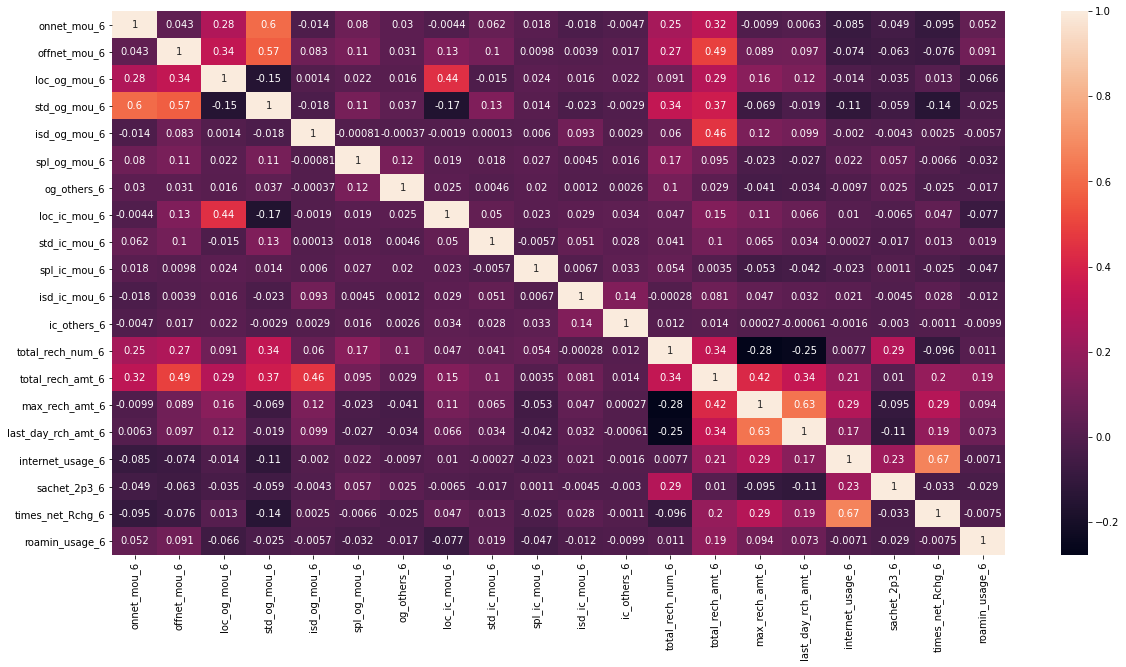

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(june_data.corr(),annot = True)

In [ ]:
#Dropping columns with high co relation/multicollinearity
delt=["std_og_mou_6","std_og_mou_7","std_og_mou_8","total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"]
data1=data1.drop(delt,axis=1)

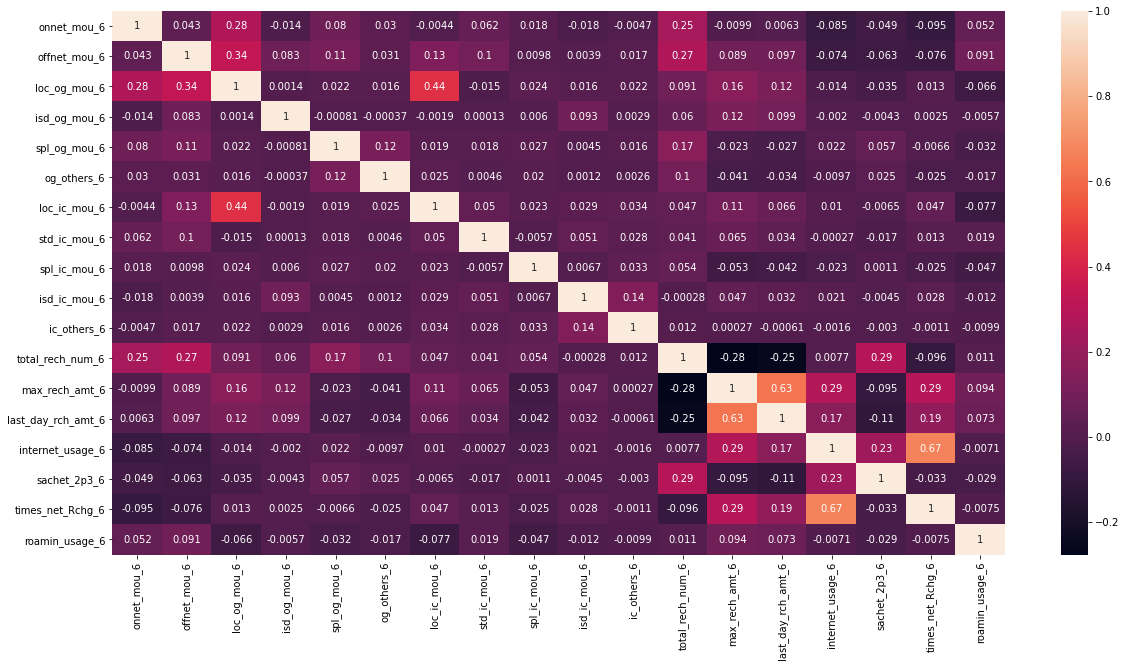

In [ ]:
june_data=month_data(data1,"6")
plot_heat_map(june_data)

In [ ]:
#Since dataset looks okay now, we can check our full dataset now
columns_still=["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou"]
data1=data1.drop(columns_still,axis=1)


In [ ]:
# Let's see the correlation matrix of our final dataset[ we can remove added features if corelated]
#plot_heat_map(data1)

In [ ]:
#Checking Finalll frame for null values 
#Final Feature space
print(data1.shape)
print(data1.isnull().sum().sum())
describe_percentile(data1)

(36270, 60)
0


,mobile_number,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,internet_usage_8,sachet_2p3_6,sachet_2p3_7,sachet_2p3_8,times_net_Rchg_6,times_net_Rchg_7,times_net_Rchg_8,roamin_usage_6,roamin_usage_7,roamin_usage_8
count,3.627000e+04,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,...,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.000000,36270.00000,36270.000000,36270.000000,36270.000000
mean,7.001227e+09,254.332156,261.557958,232.358770,365.119716,369.014105,332.021904,256.011797,258.269355,241.614779,...,309.099633,0.655804,0.746292,0.742239,0.274497,0.290185,0.27571,38.348952,28.636994,28.847650
std,6.823954e+05,416.391706,437.309990,418.527477,427.478080,440.491792,417.182905,348.897020,348.039600,337.579126,...,830.156578,2.137831,2.336798,2.293350,0.627851,0.666320,0.66454,159.819090,138.913355,144.355579
min,7.000000e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,7.000650e+09,36.060000,35.030000,27.180000,121.090000,118.240000,93.115000,51.295000,55.560000,43.660000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
30%,7.000771e+09,46.990000,45.760000,36.810000,144.280000,141.860000,115.460000,67.330000,71.774000,59.380000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,7.001235e+09,107.180000,105.680000,87.780000,243.190000,239.830000,211.710000,153.400000,156.830000,141.730000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
70%,7.001698e+09,230.996000,234.910000,195.716000,389.410000,393.783000,357.548000,283.396000,284.355000,264.883000,...,54.472000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
85%,7.002045e+09,484.090000,506.925000,438.448500,625.786500,641.523000,587.577000,465.473000,469.766000,449.536500,...,713.742000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,25.546000,6.926500,10.730000
90%,7.002168e+09,668.105000,689.581000,614.696000,789.668000,814.181000,750.635000,587.297000,588.555000,569.662000,...,1025.069000,2.000000,2.000000,2.000000,1.000000,1.000000,1.00000,77.020000,43.382000,44.073000


In [ ]:
#Clearly we can see their are outliers in almost every feature
#We may loose some churn data but, may get a good model on the basis of quality we use

In [ ]:
#Churn rate before dealing with outliers
churn_rate(data1)

6.708023159636063

In [ ]:
data1.info(object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36270 entries, 0 to 99997
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mobile_number          36270 non-null  int64  
 1   onnet_mou_6            36270 non-null  float64
 2   onnet_mou_7            36270 non-null  float64
 3   onnet_mou_8            36270 non-null  float64
 4   offnet_mou_6           36270 non-null  float64
 5   offnet_mou_7           36270 non-null  float64
 6   offnet_mou_8           36270 non-null  float64
 7   loc_og_mou_6           36270 non-null  float64
 8   loc_og_mou_7           36270 non-null  float64
 9   loc_og_mou_8           36270 non-null  float64
 10  isd_og_mou_6           36270 non-null  float64
 11  isd_og_mou_7           36270 non-null  float64
 12  isd_og_mou_8           36270 non-null  float64
 13  spl_og_mou_6           36270 non-null  float64
 14  spl_og_mou_7           36270 non-null  float64
 15  sp

###  Handeling Outliers

/home/boeka/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/boeka/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/boeka/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/boeka/.local/

<AxesSubplot:xlabel='ic_others_6'>

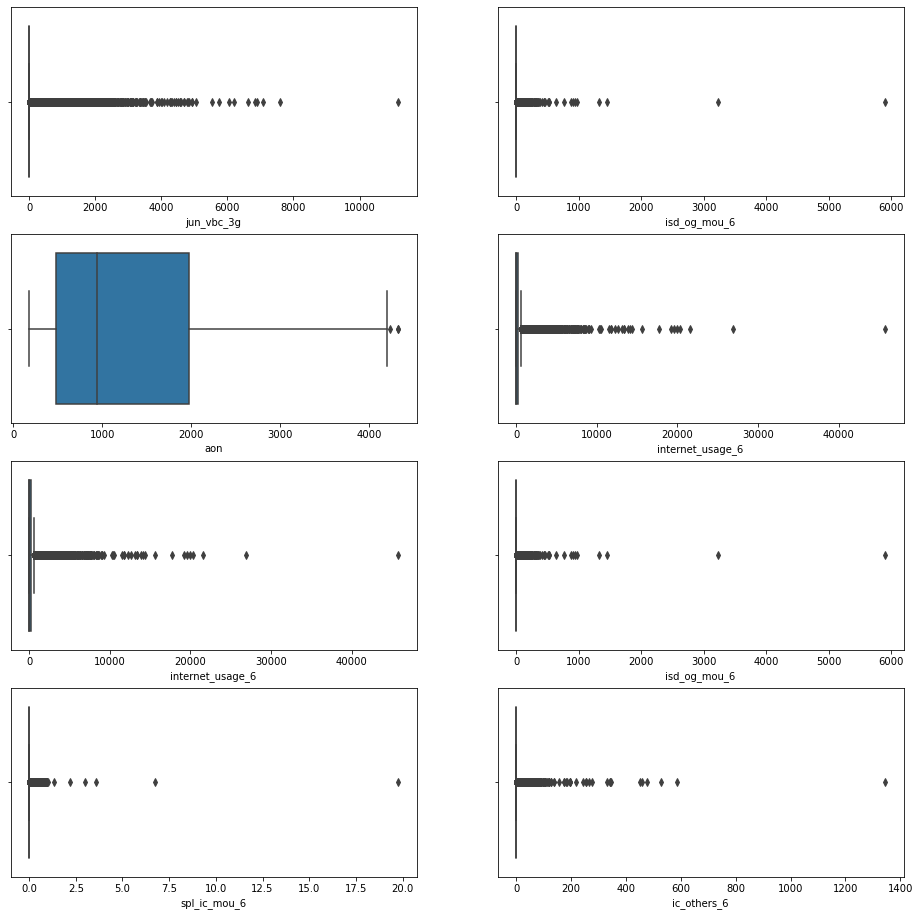

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.boxplot(data1.jun_vbc_3g, ax=ax[0,0]) 
sns.boxplot(data1.isd_og_mou_6, ax=ax[0,1]) 
sns.boxplot(data1.aon,  ax=ax[1,0]) 
sns.boxplot(data1.internet_usage_6,ax=ax[1,1]) 
sns.boxplot(data1.internet_usage_6, ax=ax[2,0])
sns.boxplot(data1.isd_og_mou_6, ax=ax[2,1])
sns.boxplot(data1.spl_ic_mou_6, ax=ax[3,0]) 
sns.boxplot(data1.ic_others_6, ax=ax[3,1]) 

In [ ]:
#Using Z-score to eliminate the outliers
z_scores = stats.zscore(data1)
#calculate z-scores of `data1`
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 5).all(axis=1) #Hit and trial =>5.5
new_df = data1[filtered_entries]

In [ ]:
#Checking for outlies again using describe
describe_percentile(new_df)

,mobile_number,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,internet_usage_8,sachet_2p3_6,sachet_2p3_7,sachet_2p3_8,times_net_Rchg_6,times_net_Rchg_7,times_net_Rchg_8,roamin_usage_6,roamin_usage_7,roamin_usage_8
count,3.105500e+04,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,...,31055.000000,31055.000000,31055.000000,31055.00000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000
mean,7.001233e+09,224.765590,229.542798,201.929802,328.087153,329.183744,296.522883,234.737653,235.869245,221.435266,...,228.373110,0.501852,0.583352,0.59430,0.235357,0.246530,0.232040,25.139659,16.738897,17.618178
std,6.794790e+05,312.920025,324.540450,303.952302,322.073485,324.106409,309.521524,260.294902,257.139403,253.760220,...,510.651611,1.424804,1.618865,1.58318,0.511187,0.527854,0.526674,86.941204,65.470636,68.726830
min,7.000000e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000661e+09,36.100000,34.950000,27.090000,119.850000,116.760000,91.990000,52.540000,57.250000,44.960000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,7.000782e+09,46.730000,45.190000,36.340000,141.844000,139.466000,113.450000,68.630000,73.664000,60.794000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001243e+09,104.790000,102.690000,87.780000,236.660000,233.280000,209.760000,153.400000,156.830000,141.730000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
70%,7.001699e+09,219.154000,221.660000,184.050000,369.472000,370.926000,335.656000,278.556000,278.256000,260.340000,...,1.334000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
85%,7.002046e+09,448.257000,468.425000,405.587000,573.878000,585.600000,538.589000,445.542000,445.426000,426.357000,...,592.488000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,18.477000,2.367000,6.159000
90%,7.002169e+09,612.502000,628.490000,561.020000,716.786000,729.572000,671.230000,552.350000,549.030000,534.264000,...,875.066000,2.000000,2.000000,2.00000,1.000000,1.000000,1.000000,59.800000,31.440000,33.262000


In [ ]:
churn_rate(new_df)

6.520689099983899

In [ ]:
#Data after handelling outliers
data1=new_df
new_df.shape

(31055, 60)

###  Scaling and creating dummy feautres

In [ ]:
#Categorising columns in list
categorical_feature=[ 'sachet_2p3_6',
       'sachet_2p3_7', 'sachet_2p3_8', 'times_net_Rchg_6', 'times_net_Rchg_7',
       'times_net_Rchg_8']
exclude_list=[ 'mobile_number','Target_variable_churn','sachet_2p3_6',
       'sachet_2p3_7', 'sachet_2p3_8', 'times_net_Rchg_6', 'times_net_Rchg_7',
       'times_net_Rchg_8']
exclude_list2=["Target_variable_churn","mobile_number"]

dummy=list(new_df.columns)
contineous_features = [ele for ele in dummy if ele not in exclude_list]


In [ ]:
#Scaling contineous data
scaler=MinMaxScaler()
cont_data=new_df.loc[:,contineous_features]
df1=cont_data
scaled_data=pd.DataFrame(scaler.fit_transform(cont_data))
scaled_data.columns=df1.columns
describe_percentile(scaled_data)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,isd_og_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,internet_usage_6,internet_usage_7,internet_usage_8,roamin_usage_6,roamin_usage_7,roamin_usage_8
count,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,...,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000
mean,0.096392,0.094134,0.086874,0.131509,0.128068,0.122660,0.117961,0.119308,0.115974,0.003091,...,0.277924,0.044494,0.042998,0.040875,0.051621,0.053786,0.051304,0.030031,0.023382,0.023557
std,0.134197,0.133091,0.130766,0.129099,0.126093,0.128037,0.130804,0.130067,0.132903,0.032017,...,0.242822,0.123691,0.121544,0.120080,0.112569,0.114652,0.114718,0.103858,0.091452,0.091896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015482,0.014333,0.011655,0.048040,0.045425,0.038053,0.026403,0.028958,0.023547,0.000000,...,0.075956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,0.020040,0.018532,0.015634,0.056856,0.054259,0.046930,0.034488,0.037261,0.031840,0.000000,...,0.090999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.044940,0.042112,0.037765,0.094862,0.090757,0.086769,0.077087,0.079328,0.074229,0.000000,...,0.193588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
70%,0.093985,0.090901,0.079182,0.148098,0.144308,0.138848,0.139981,0.140748,0.136349,0.000000,...,0.373366,0.000000,0.000000,0.000000,0.005184,0.009641,0.000300,0.000000,0.000000,0.000000
85%,0.192237,0.192097,0.174492,0.230032,0.227826,0.222793,0.223895,0.225306,0.223298,0.000000,...,0.596547,0.071524,0.064659,0.052354,0.134472,0.141456,0.133102,0.022072,0.003306,0.008235
90%,0.262675,0.257738,0.241362,0.287314,0.283838,0.277661,0.277568,0.277711,0.279813,0.000000,...,0.669297,0.165979,0.157267,0.141826,0.197671,0.205409,0.196583,0.071435,0.043917,0.044475


In [ ]:
#Adding mobile_number to merge on later
scaled_data["mobile_number"]=list(new_df.mobile_number)

In [ ]:
#Creating categorical dataset and merging with scaled data
categ_data=new_df.loc[:,categorical_feature]
categ_data["mobile_number"]=new_df.mobile_number

#Merging Data Frames
partial=scaled_data.merge(categ_data, how="outer",on="mobile_number" )
#Dropping mobile_number [:-will add later]
partial=partial.drop("mobile_number",axis=1)
print(partial.shape)
describe_percentile(partial)

(31055, 58)


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,isd_og_mou_6,...,internet_usage_8,roamin_usage_6,roamin_usage_7,roamin_usage_8,sachet_2p3_6,sachet_2p3_7,sachet_2p3_8,times_net_Rchg_6,times_net_Rchg_7,times_net_Rchg_8
count,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,...,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.000000,31055.00000,31055.000000,31055.000000,31055.000000
mean,0.096392,0.094134,0.086874,0.131509,0.128068,0.122660,0.117961,0.119308,0.115974,0.003091,...,0.051304,0.030031,0.023382,0.023557,0.501852,0.583352,0.59430,0.235357,0.246530,0.232040
std,0.134197,0.133091,0.130766,0.129099,0.126093,0.128037,0.130804,0.130067,0.132903,0.032017,...,0.114718,0.103858,0.091452,0.091896,1.424804,1.618865,1.58318,0.511187,0.527854,0.526674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.015482,0.014333,0.011655,0.048040,0.045425,0.038053,0.026403,0.028958,0.023547,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
30%,0.020040,0.018532,0.015634,0.056856,0.054259,0.046930,0.034488,0.037261,0.031840,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.044940,0.042112,0.037765,0.094862,0.090757,0.086769,0.077087,0.079328,0.074229,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
70%,0.093985,0.090901,0.079182,0.148098,0.144308,0.138848,0.139981,0.140748,0.136349,0.000000,...,0.000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
85%,0.192237,0.192097,0.174492,0.230032,0.227826,0.222793,0.223895,0.225306,0.223298,0.000000,...,0.133102,0.022072,0.003306,0.008235,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
90%,0.262675,0.257738,0.241362,0.287314,0.283838,0.277661,0.277568,0.277711,0.279813,0.000000,...,0.196583,0.071435,0.043917,0.044475,2.000000,2.000000,2.00000,1.000000,1.000000,1.000000


In [ ]:
#Creating dummies for categorical variable
partial=pd.get_dummies(partial, prefix=categorical_feature , columns=categorical_feature)
partial["Target_variable_churn"]=list(new_df.Target_variable_churn)
partial['mobile_number']=list(new_df.mobile_number)
partial.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,isd_og_mou_6,...,times_net_Rchg_7_0,times_net_Rchg_7_1,times_net_Rchg_7_2,times_net_Rchg_7_3,times_net_Rchg_8_0,times_net_Rchg_8_1,times_net_Rchg_8_2,times_net_Rchg_8_3,Target_variable_churn,mobile_number
0,0.045965,0.043338,0.000000,0.097480,0.093305,0.000000,0.077087,0.079328,0.000000,0.0,...,0,1,0,0,0,1,0,0,1,7000842753
1,0.042847,0.022305,0.133790,0.049427,0.042410,0.029651,0.091977,0.060031,0.019897,0.0,...,1,0,0,0,1,0,0,0,0,7001204172
2,0.177413,0.143954,0.015092,0.037943,0.031369,0.056456,0.189999,0.145768,0.033016,0.0,...,0,1,0,0,1,0,0,0,0,7001524846
3,0.021661,0.030351,0.030378,0.118764,0.089380,0.067327,0.158752,0.109075,0.107853,0.0,...,1,0,0,0,1,0,0,0,0,7000875565
4,0.031053,0.035567,0.030623,0.079702,0.087684,0.054814,0.127204,0.128929,0.085479,0.0,...,1,0,0,0,1,0,0,0,0,7001028254


In [ ]:
print(churn_rate(partial))
partial.isna().sum().sum()

6.520689099983899


0

# Dividing data in Train and Test

### Normal dataset with all dummies

In [ ]:
partial_train=partial.drop(exclude_list2,axis=1)
target_variable=partial.Target_variable_churn
partial_index=partial.mobile_number

In [ ]:
print(partial_train.shape)
print(target_variable.shape)
print(partial.shape)

(31055, 102)
(31055,)
(31055, 104)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test in ratio [7:3]
X_trainpartial, X_testpartial, y_trainpartial, y_testpartial = train_test_split(partial.drop("Target_variable_churn",axis=1),
                                                                                target_variable, train_size=0.7,test_size=0.3,random_state=100)
partial_testIndex=X_testpartial.mobile_number
X_trainpartial=X_trainpartial.drop("mobile_number",axis=1)
X_testpartial=X_testpartial.drop("mobile_number",axis=1)
print(X_trainpartial.shape)
print(y_trainpartial.shape)
print(X_testpartial.shape)
print(y_testpartial.shape)

(21738, 102)
(21738,)
(9317, 102)
(9317,)


### Dataset with Lesser data columns

In [ ]:
lesser=scaled_data.merge(categ_data, how="outer",on="mobile_number")
small_pac_list=['sachet_2p3_6','sachet_2p3_7','sachet_2p3_8']
lesser=lesser.drop(small_pac_list,axis=1)

In [ ]:
# Splitting the data into train and test in ratio [7:3]
X_trainlesser, X_testlesser, y_trainlesser, y_testlesser = train_test_split(lesser,target_variable, train_size=0.7,test_size=0.3,random_state=100)
lesser_testIndex=X_testlesser.mobile_number
X_trainlesser=X_trainlesser.drop("mobile_number",axis=1)
X_testlesser=X_testlesser.drop("mobile_number",axis=1)
print(X_trainlesser.shape)
print(y_trainlesser.shape)
print(X_testlesser.shape)
print(y_testlesser.shape)

(21738, 55)
(21738,)
(9317, 55)
(9317,)


### Dataset with Slightly more data columns

In [ ]:
#Dataset after removing small recharges
dummy=['times_net_Rchg_6','times_net_Rchg_7','times_net_Rchg_8']
X_trainmedium=pd.get_dummies(X_trainlesser, prefix=dummy , columns=dummy)
X_testmedium =pd.get_dummies(X_testlesser, prefix=dummy , columns=dummy)
y_trainmedium=y_trainlesser
y_testmedium=y_testlesser

## Class Imbalance 

In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(lesser, target_variable)

print('Original dataset shape', lesser.shape,target_variable.shape)
print('Resample dataset shape', x_smote.shape,y_smote.shape)

Original dataset shape (31055, 56) (31055,)
Resample dataset shape (58060, 56) (58060,)


In [ ]:
# Splitting the data into train and test in ratio [7:3]
X_train0, X_test0, y_train, y_test = train_test_split(x_smote, y_smote, train_size=0.7,test_size=0.3,random_state=100)
print(X_train0.shape)
print(y_train.shape)
print(X_test0.shape)
print(y_test.shape)
X_train=X_train0.drop('mobile_number',axis=1)
index_X_testsmote=X_test0.mobile_number
X_test =X_test0.drop('mobile_number',axis=1)

(40642, 56)
(40642,)
(17418, 56)
(17418,)


# RFE for feature selection

In [ ]:
#We want top features for our model hence we will use each dataset with different variables in RFE
#After this, we take intersection of featires suggested by the RFE

In [ ]:
#Data set with 55 features 

In [ ]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=35)             # running RFE with 13 variables as output
rfelesser = rfe.fit(X_trainlesser,y_trainlesser)

In [ ]:
setlesser=set(X_trainlesser.columns[rfelesser.support_])

In [ ]:
#Data set with 102 features and all dummies

In [ ]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=35)             # running RFE with 35 variables as output
rfepartial = rfe.fit(X_trainpartial,y_trainpartial)

In [ ]:
setpartial=set(X_trainpartial.columns[rfepartial.support_])

In [ ]:
#Data set with 64 features

In [ ]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=35)             # running RFE with 35 variables as output
rfemedium = rfe.fit(X_trainmedium,y_trainmedium)

In [ ]:
setmedium=set(X_trainmedium.columns[rfemedium.support_])

In [ ]:
#Data set with balanced class and 55 variables

In [ ]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=35)             # running RFE with 35 variables as output
rfe = rfe.fit(X_train,y_train)

In [ ]:
setnormal=set(X_train.columns[rfe.support_])

In [ ]:
#Intersection of all results
#top15features=list(setlesser.union(setmedium,setpartial,setnormal)) 
topfeatures=list(setlesser.intersection(setmedium,setpartial,setnormal))
topfeatures

['isd_ic_mou_6',
 'total_rech_num_8',
 'max_rech_amt_6',
 'offnet_mou_7',
 'spl_ic_mou_8',
 'last_day_rch_amt_7',
 'aon',
 'onnet_mou_7',
 'last_day_rch_amt_8',
 'onnet_mou_6',
 'aug_vbc_3g',
 'isd_ic_mou_8',
 'total_rech_num_7',
 'loc_og_mou_8',
 'loc_ic_mou_6',
 'std_ic_mou_7',
 'onnet_mou_8',
 'max_rech_amt_7',
 'std_ic_mou_8',
 'internet_usage_8',
 'roamin_usage_8',
 'loc_ic_mou_8',
 'max_rech_amt_8']

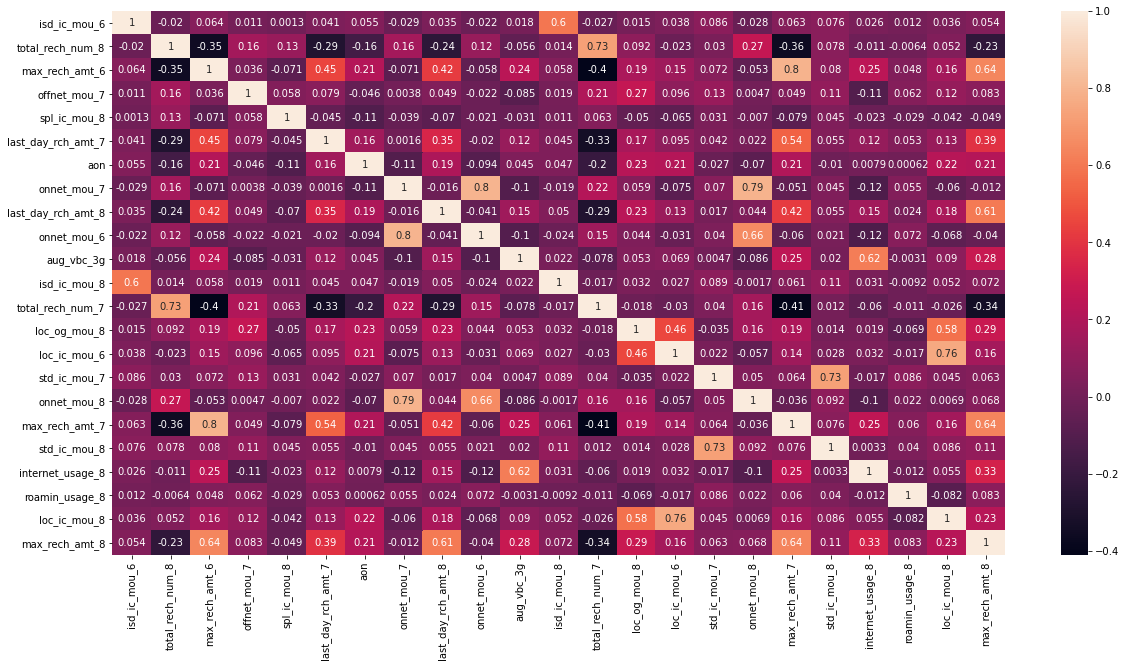

In [ ]:
x=partial.loc[:,topfeatures]
plot_heat_map(x)


In [ ]:
#RRetaining common from all for now ( union might do better but for now it is intersection)
X_train_new=X_trainlesser.loc[:,topfeatures]
X_test_new=X_testlesser.loc[:,topfeatures]
y_test_new=y_testlesser
y_train_new=y_trainlesser

#  Modelling: Logistic Regression

In [ ]:
logsk = LogisticRegression(random_state=42,max_iter=1000)
logsk.fit(X_train_new, y_train_new)

# Predicted probabilities
y_pred = logsk.predict(X_test_new)
print(y_pred.sum())
print(y_testlesser.sum())

#Score roc_auc
print("ROC_AUC score")
"{:2.2}".format(metrics.roc_auc_score(y_test_new, y_pred))

155
620
ROC_AUC score


'0.56'

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_test_new, y_pred )
confusion

array([[8618,   79],
       [ 544,   76]])

In [ ]:
#Retaining 30 features out of all we have almost ~102
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=30)             # running RFE with 30 variables as output
rfelesser = rfe.fit(X_trainpartial,y_trainpartial)

In [ ]:
new_feature=X_trainpartial.columns[rfe.support_]

In [ ]:
X_train_new=X_trainpartial.loc[:,new_feature]
X_test_new=X_testpartial.loc[:,new_feature]

In [ ]:
logsk = LogisticRegression(random_state=42,max_iter=1000)
logsk.fit(X_train_new, y_train_new)

# Predicted probabilities
y_pred = logsk.predict(X_test_new)
print(y_pred.sum())
print(y_testpartial.sum())

#Score roc_auc
print("ROC_AUC score")
"{:2.2}".format(metrics.roc_auc_score(y_testpartial, y_pred))

154
620
ROC_AUC score


'0.56'

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_test_new, y_pred )
confusion

array([[8621,   76],
       [ 542,   78]])

In [ ]:
#Testing with 102 features

logsk = LogisticRegression(random_state=42,max_iter=1000)
logsk.fit(X_trainpartial, y_trainpartial)

# Predicted probabilities
y_pred = logsk.predict(X_testpartial)
print(y_pred.sum())
print(y_testpartial.sum())

#Score roc_auc
print("ROC_AUC score")
"{:2.2}".format(metrics.roc_auc_score(y_testpartial, y_pred))

166
620
ROC_AUC score


'0.57'

In [ ]:
#Dropping feature with less imp
dummy=month_data(X_trainlesser,"6").columns
new_features = [ele for ele in topfeatures if ele not in dummy]


In [ ]:
logsk = LogisticRegression(random_state=42,max_iter=1000)
logsk.fit(X_trainmedium, y_trainmedium)

# Predicted probabilities
y_pred = logsk.predict(X_testmedium)
print(y_pred.sum())
print(y_testmedium.sum())

#Score roc_auc
print("ROC_AUC score")
"{:2.2}".format(metrics.roc_auc_score(y_testmedium, y_pred))

168
620
ROC_AUC score


'0.57'

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_test_new, y_pred )
confusion

array([[8621,   76],
       [ 528,   92]])

# PCA

In [ ]:
#Running PCA on balanced class data

# Creating Instant and fitting train_set
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

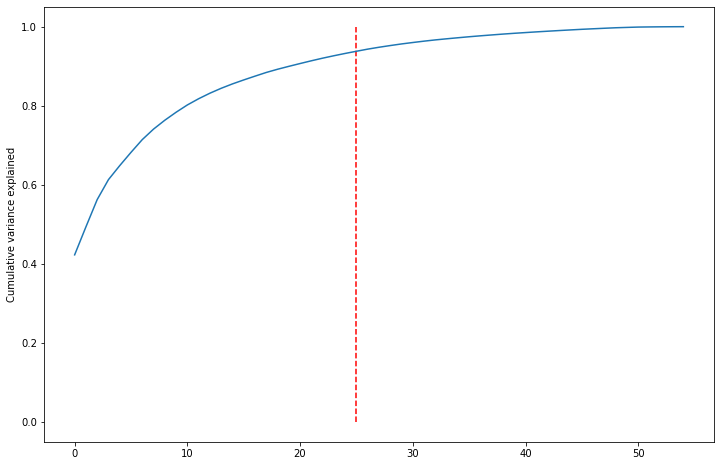

In [ ]:
#Visualising variance explained by this analysis
#Fig shows explainability of 25 components

var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=25, ymax=1, ymin=0, colors="r", linestyles="--")
#plt.hlines(y=0.887, xmax=40, xmin=10, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
#Around 30 components would do the job it seems 
#Moving forward with Incremental PCA

In [ ]:
# Using 30 components for PCA

pca_final = IncrementalPCA(n_components=25)

df_train_pca = pca_final.fit_transform(X_train)
#Changing our test set accordingly
df_test_pca = pca_final.transform(X_test)

print(df_train_pca.shape)
print(df_test_pca.shape)

#Creating co_relation matrix
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(40642, 25)
(17418, 25)


(25, 25)

In [ ]:
#Creating learning algorithm
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)

#Predicting on test set 
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

#Calculating roc_auc_score
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.91'

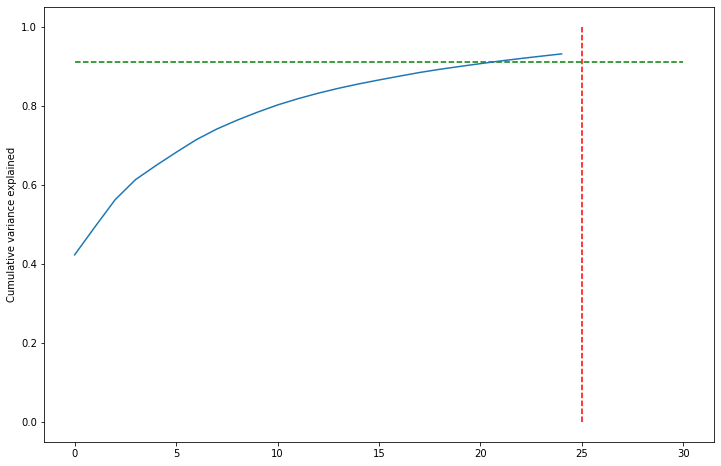

In [ ]:
#Visualising variance explained 
var_cumu = np.cumsum(pca_final.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=25, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.91, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
#Running PCA on our finalised data with class imbalance of 6.5% churn rate only

In [ ]:
# Using PCA again 
pca_again = PCA(0.9)  # more then 0.6 either tends to 1 in score or in less score then 0.84
#pca_again = PCA(n_components=4)  # more then n_components=4 tends to 1 or less then 0.83
df_train_pca2 = pca_again.fit_transform(X_trainpartial)
print(df_train_pca2.shape)
df_test_pca2 = pca_again.transform(X_testpartial)
print(df_test_pca2.shape)


(21738, 34)
(9317, 34)


In [ ]:
#Creating learning algorithm
learner_pca2 = LogisticRegression(max_iter=1000)
model_pca2 = learner_pca2.fit(df_train_pca2, y_trainpartial)

#Predicting on test set 
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

#Calculating roc_auc_score
"{:2.2}".format(metrics.roc_auc_score(y_testpartial, pred_probs_test2))

'0.87'

In [ ]:
#Thus we can use PCA to gain something around 85-90% accuracy in our model
#While simply processing requires more features to attain same accuracy